# Zero To Hero Big Data Prepration
Taking Advantage of Cloud Technologies to Create Big Data Solutions
    
    AUTHOR: Dr. Roy Jafari 

## Chapter 4: Types of Data Manipulations 

### Learning the Types of Data Manipulations
#### Data Wrangling
##### Example of Data Wrangling – Computer Vision Case Study

In [6]:
from tensorflow.keras.datasets import mnist
(train_d,train_l), (test_d,test_l) = mnist.load_data()

In [7]:
print(train_d.shape)
print(train_l.shape)
print(test_d.shape)
print(test_l.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [8]:
train_d[0,:,:].shape

(28, 28)

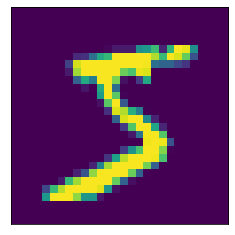

5


In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(train_d[0,:,:])
plt.xticks([])
plt.yticks([])
plt.show()

print(train_l[0])

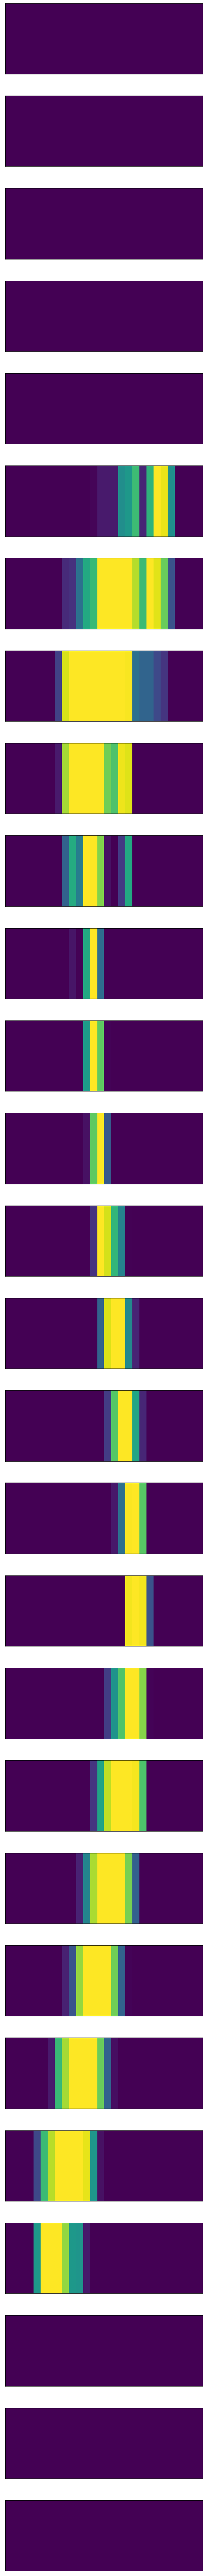

In [29]:
# Figure 4.1 – The first mnist image before and after restructuring
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
plt.figure(figsize=(0.75*10,10*10))
for i in range(28):
    plt.subplot(28,1,i+1)
    first_row_image = train_d[0,i,:] 
    restructured_image = first_row_image.reshape(1,-1)
    show_image = np.tile(restructured_image,(10,1))
    plt.imshow(show_image)
    plt.xticks([])
    plt.yticks([])
plt.savefig('images/row_seperated_first_image.png',dpi=500)

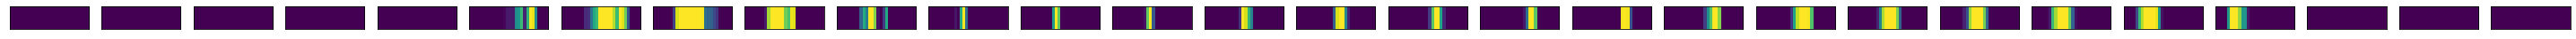

In [24]:
# Figure 4.1 – The first mnist image before and after restructuring
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(4*10,0.75*30))
for i in range(28):
    plt.subplot(1,28,i+1)
    first_row_image = train_d[0,i,:] 
    restructured_image = first_row_image.reshape(1,-1)
    show_image = np.tile(restructured_image,(8,1))
    plt.imshow(show_image)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.savefig('images/resturcured_first_image_mnist.png',dpi=500)

In [41]:
reshaped_train_d = train_d.reshape(60000,-1)

In [42]:
print(reshaped_train_d.shape)

(60000, 784)


#### Data Integration
##### Example of having to perform data wrangling before data integration

In [79]:
import pandas as pd
#shop_df = pd.read_csv('https://packt-data-prep-workshop.s3.eu-west-1.amazonaws.com/US_Shops_simulated.csv')
#temp_df = pd.read_csv('https://packt-data-prep-workshop.s3.eu-west-1.amazonaws.com/US_Temp_simulated.csv')

shop_df = pd.read_csv('data/US_Shops_simulated.csv')
temp_df = pd.read_csv('data/US_Temp_simulated.csv')

In [115]:
temp_df.datetimes = pd.to_datetime(temp_df.datetimes)
temp_df ['Date'] = temp_df.datetimes.dt.date.astype(str)
temp_daily_df = (temp_df
                 .groupby(['Date','State'])
                 .temperature.mean()
                 .reset_index())

In [120]:
shop_df

,Date,Month,Year,State,Location,number_of_customer_visits,revenue,profit
0,2022-10-06,10,2022,Alabama,Shop1,903,8769.03,263.07
1,2022-10-06,10,2022,Alabama,Shop2,772,10784.07,420.58
2,2022-10-06,10,2022,Alabama,Shop3,349,3661.01,58.58
3,2022-10-06,10,2022,Alabama,Shop4,604,5692.10,108.15
4,2022-10-06,10,2022,Alabama,Shop5,617,7892.05,378.82
...,...,...,...,...,...,...,...,...
5547265,2019-10-08,10,2019,Wyoming,Shop125,117,544.17,27.21
5547266,2019-10-08,10,2019,Wyoming,Shop126,848,9692.64,164.77
5547267,2019-10-08,10,2019,Wyoming,Shop127,543,2922.97,64.31
5547268,2019-10-08,10,2019,Wyoming,Shop128,690,6372.84,350.51


In [124]:
shop_df.merge(temp_daily_df, 
              on = ['Date','State'],
              how='left')

,Date,Month,Year,State,Location,number_of_customer_visits,revenue,profit,temperature
0,2022-10-06,10,2022,Alabama,Shop1,903,8769.03,263.07,70.800
1,2022-10-06,10,2022,Alabama,Shop2,772,10784.07,420.58,70.800
2,2022-10-06,10,2022,Alabama,Shop3,349,3661.01,58.58,70.800
3,2022-10-06,10,2022,Alabama,Shop4,604,5692.10,108.15,70.800
4,2022-10-06,10,2022,Alabama,Shop5,617,7892.05,378.82,70.800
...,...,...,...,...,...,...,...,...,...
5547265,2019-10-08,10,2019,Wyoming,Shop125,117,544.17,27.21,70.825
5547266,2019-10-08,10,2019,Wyoming,Shop126,848,9692.64,164.77,70.825
5547267,2019-10-08,10,2019,Wyoming,Shop127,543,2922.97,64.31,70.825
5547268,2019-10-08,10,2019,Wyoming,Shop128,690,6372.84,350.51,70.825


#### Data Cleaning

##### Data Cleaning Level 1
##### Example of Level 1 Data Cleaning – Writing a quick Lookup function

In [ ]:
import pandas as pd
#shop_df = pd.read_csv('https://packt-data-prep-workshop.s3.eu-west-1.amazonaws.com/US_Shops_simulated.csv')

shop_df = pd.read_csv('data/US_Shops_simulated.csv')

In [126]:
shop_df

,Date,Month,Year,State,Location,number_of_customer_visits,revenue,profit
0,2022-10-06,10,2022,Alabama,Shop1,903,8769.03,263.07
1,2022-10-06,10,2022,Alabama,Shop2,772,10784.07,420.58
2,2022-10-06,10,2022,Alabama,Shop3,349,3661.01,58.58
3,2022-10-06,10,2022,Alabama,Shop4,604,5692.10,108.15
4,2022-10-06,10,2022,Alabama,Shop5,617,7892.05,378.82
...,...,...,...,...,...,...,...,...
5547265,2019-10-08,10,2019,Wyoming,Shop125,117,544.17,27.21
5547266,2019-10-08,10,2019,Wyoming,Shop126,848,9692.64,164.77
5547267,2019-10-08,10,2019,Wyoming,Shop127,543,2922.97,64.31
5547268,2019-10-08,10,2019,Wyoming,Shop128,690,6372.84,350.51


In [127]:
def look_up_without(date,state,location):
    
    BM =( 
        (shop_df.Date == date) &
        (shop_df.State == state) &
        (shop_df.Location == location)     
    )
    
    if(sum(BM)==0):
        print('There are no records with the inputed values')
    else:
        return(shop_df[BM].iloc[0])

In [161]:
%%time
look_up_without('2022-10-06','Alabama','Shop3')

Wall time: 1.6 s


Date                         2022-10-06
Month                                10
Year                               2022
State                           Alabama
Location                          Shop3
number_of_customer_visits           349
revenue                         3661.01
profit                            58.58
Name: 2, dtype: object

In [162]:
Dates = shop_df.Date.unique()
States = shop_df.State.unique()
Locations = shop_df.Location.unique()

shop_cleaned_df = shop_df.set_index(
    ['Date','State','Location']
)

In [163]:
def look_up_with(date,state,location):
    
    if (
        date not in Dates or
        state not in States or
        location not in Locations
    ):
        print('There are no records with the inputed values')
    else:
        return(shop_cleaned_df.loc[(date,state,location)])

In [164]:
%%time
look_up_with('2022-110-06','Alabama','Shop3')

There are no records with the inputed values
Wall time: 1.03 ms
